# Import and initial setup

In [347]:
# Import Necessary Libaraies
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

import numpy as np

# Initial configuration
raw_data_path = './Data/apartments_for_rent_classified_100K.csv'
sns.set_style('darkgrid')

In [348]:
# Determine what encoding has been used
with open(raw_data_path, 'rb') as file:
    result = chardet.detect(file.read(100000))
    file_encoding = result['encoding']
file_encoding

'Windows-1252'

In [349]:
# Import Data
raw_data = pd.read_csv(raw_data_path, encoding=file_encoding, sep=';', low_memory=False)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   39068 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-null  object 
 18  latitu

In [350]:
raw_data

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,5121219946,housing/rent/apartment,Houston - superb Apartment nearby fine dining,"Redefining urban living, in southeast Houston,...","Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,USD,No,Yes,...,$780,Monthly,605,NaN,Houston,TX,29.6151,-95.1998,RentDigs.com,1544185770
99488,5121219696,housing/rent/apartment,The Best of the Best in the City of Jacksonvil...,Courtney Manor Apartments offer the best of ev...,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,USD,No,Yes,...,$813,Monthly,921,NaN,Jacksonville,FL,30.2254,-81.7579,RentDigs.com,1544185750
99489,5121219420,housing/rent/apartment,A great & large One BR apartment. Pet OK!,"Fully remodeled, new floor, kitchen cabinet, s...","Garbage Disposal,Refrigerator",1.0,1.0,USD,No,Yes,...,"$1,325",Monthly,650,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1544185729
99490,5121218935,housing/rent/apartment,"The Crest offers studio, 1, 2 & Three BR homes...","Amenities include a fitness facilities, swimmi...","Gym,Pool",1.0,1.0,USD,No,Yes,...,$931,Monthly,701,NaN,Huntersville,NC,35.4158,-80.8451,RentDigs.com,1544185670


# Initial Data Cleaning

## Looking for missing values

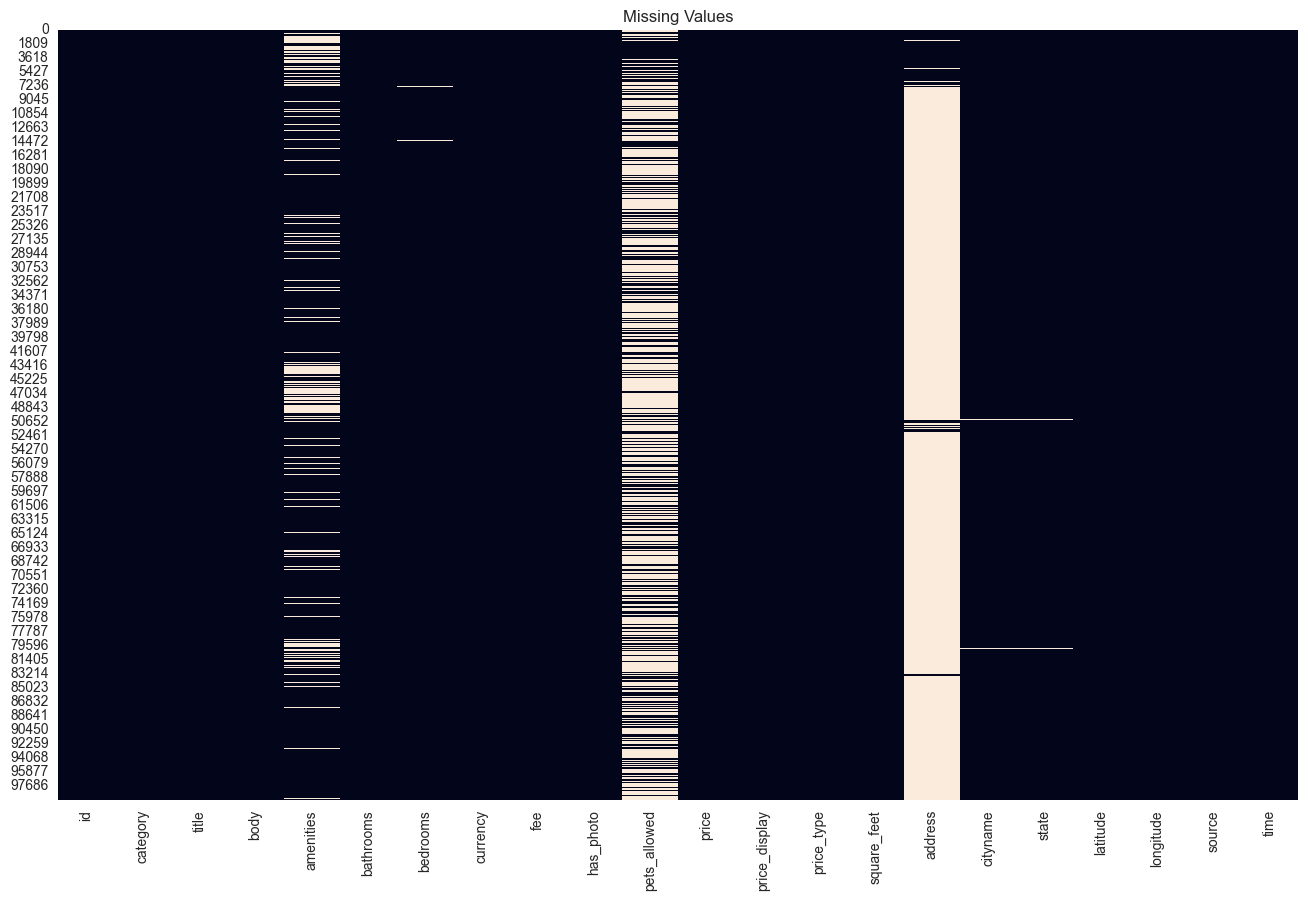

In [351]:
plt.figure(figsize=(16,10))
sns.heatmap(raw_data.isnull(), cbar=False)
plt.title('Missing Values')
plt.show()

Ved at se på grafen her over kan man konkludere at det ikke vil være gavnligt medtage kolonnen 'address' grundet den store mængde manglende data.
Der opstår her et problem i kolonnen 'pets_allowed' samt 'amenities' da Pandas biblioteket læser værdien 'None','null' og 'NaN', jeg tolker disse som ingen dyr tilladt og ingen amenities.

In [352]:
print(f"Procentage of columns lacking the amenities value:  {(len(raw_data.loc[raw_data['amenities'].isnull()])/len(raw_data))*100}")
print(f"Procentage of columns lacking the pets_allowed value:  {(len(raw_data.loc[raw_data['pets_allowed'].isnull()])/len(raw_data))*100}")
print(f"Procentage of columns lacking the address value:  {(len(raw_data.loc[raw_data['address'].isnull()])/len(raw_data))*100}")

Procentage of columns lacking the amenities value:  16.125919671933424
Procentage of columns lacking the pets_allowed value:  60.73252120773529
Procentage of columns lacking the address value:  92.01644353314839


In [353]:
# Remove columns with alot of missing values
data = raw_data.drop(['address'], axis=1, inplace=False)

Looking for missing values in bedrooms, bathrooms and price

In [354]:
data.isna().sum()

id                   0
category             0
title                0
body                 0
amenities        16044
bathrooms           63
bedrooms           124
currency             0
fee                  0
has_photo            0
pets_allowed     60424
price                1
price_display        1
price_type           0
square_feet          0
cityname           302
state              302
latitude            25
longitude           25
source               0
time                 0
dtype: int64

In [355]:
data.dropna(subset=['bedrooms', 'bathrooms', 'price'], inplace=True)
data.isna().sum()

id                   0
category             0
title                0
body                 0
amenities        15974
bathrooms            0
bedrooms             0
currency             0
fee                  0
has_photo            0
pets_allowed     60283
price                0
price_display        0
price_type           0
square_feet          0
cityname           298
state              298
latitude            25
longitude           25
source               0
time                 0
dtype: int64

## Looking for other unnessesary values

In [356]:
# Checking if all rows use usd
print(f"Amount of rows where currency is not usd: {len(raw_data.loc[raw_data['currency'] != 'USD'])}")
print(f"Amount of rowd where 'price_type' is not monthly: {len(raw_data.loc[raw_data['price_type'] != 'Monthly'])}")
print(f"Amount of rows where 'fee' is not 'No': {len(raw_data.loc[raw_data['fee'] != 'No'])}")
print(f"Amount of rows where 'category' is not 'housing/rent/apartment': {len(raw_data.loc[raw_data['category'] != 'housing/rent/apartment'])}")

Amount of rows where currency is not usd: 0
Amount of rowd where 'price_type' is not monthly: 4
Amount of rows where 'fee' is not 'No': 201
Amount of rows where 'category' is not 'housing/rent/apartment': 61


Fordi alle rækkerne benytter USD i 'currency' kolonnen, er den kolonne ikke nødvendig. kolonnen  'Price_Display' er heller ikke nødvendig da den blot formaterer prisen i forhold til 'currency' og prisen ligger for sig selv i kolonnen 'price'
'title' kolonnen er en ustruktureret beskrivelse af lejemålet, og jeg vurdere ikke denne som relevant for den vidre analyse. Det samme er gældende for 'source' kolonnen, 'time' kolonnen og 'body' kolonnen

In [357]:
data.drop(['price_display','currency', 'title', 'source', 'time', 'body', 'id'], axis=1, inplace=True)

### The Category value

In [358]:
data['category'].unique()

array(['housing/rent/apartment', 'housing/rent/home',
       'housing/rent/short_term', 'housing/rent', 'housing/rent/condo',
       'housing/rent/other', 'housing/rent/commercial/retail'],
      dtype=object)

Som vist højre oppe er der blot 61 rækker, hvor der er tale om en anden type end "housing/rent/apartment" De andre kategorier er:
- 'housing/rent/home'
- 'housing/rent/short_term'
- 'housing/rent'
- 'housing/rent/condo'
- 'housing/rent/other'
- 'housing/rent/commercial/retail'

For at forenkle dataen vurderer jeg, grundet den meget begrænset variation af data, kan jeg først fjerne rækker, hvor kategorien ikke er 'housing/rent/apartment' derefter fjerner jeg kolonnen 'category'
Det samme gør sig gældende for kolonnen 'price_type', her er der blot 4 rækker hvor værdien ikke er 'monthly'.

In [359]:
data.drop(data[data['category'] != 'housing/rent/apartment'].index, inplace=True)
data.drop(data[data['price_type'] != 'Monthly'].index, inplace=True)
data.drop(['category','price_type'], axis=1, inplace=True)
data


,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude
0,NaN,1.0,1.0,No,Thumbnail,Cats,2195.0,542,Redondo Beach,CA,33.8520,-118.3759
1,NaN,1.5,3.0,No,Thumbnail,"Cats,Dogs",1250.0,1500,Newport News,VA,37.0867,-76.4941
2,NaN,2.0,3.0,No,Thumbnail,NaN,1395.0,1650,Raleigh,NC,35.8230,-78.6438
3,NaN,1.0,2.0,No,Thumbnail,"Cats,Dogs",1600.0,820,Vacaville,CA,38.3622,-121.9712
4,NaN,1.0,1.0,No,Thumbnail,"Cats,Dogs",975.0,624,Albuquerque,NM,35.1038,-106.6110
...,...,...,...,...,...,...,...,...,...,...,...,...
99487,"Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,No,Yes,NaN,780.0,605,Houston,TX,29.6151,-95.1998
99488,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,No,Yes,"Cats,Dogs",813.0,921,Jacksonville,FL,30.2254,-81.7579
99489,"Garbage Disposal,Refrigerator",1.0,1.0,No,Yes,"Cats,Dogs",1325.0,650,San Diego,CA,32.7379,-117.0914
99490,"Gym,Pool",1.0,1.0,No,Yes,"Cats,Dogs",931.0,701,Huntersville,NC,35.4158,-80.8451


### The Amenities Values

Først finder jeg alle typer af amenities der opstår i datasettet 

In [360]:
# Find individual amenities
amenlist = list(data['amenities'])
arr_amenities = []
# Replace null values
for i in amenlist:
    if type(i) == float:
        arr_amenities.append("No Ammenities")
    else:
        arr_amenities.extend(i.split(","))
amenlist = list(arr_amenities)
print(set(amenlist))

{'No Ammenities', 'Parking', 'Patio/Deck', 'Hot Tub', 'Wood Floors', 'TV', 'Refrigerator', 'Tennis', 'Internet Access', 'Alarm', 'Gated', 'Dishwasher', 'Fireplace', 'Washer Dryer', 'View', 'AC', 'Garbage Disposal', 'Luxury', 'Elevator', 'Pool', 'Gym', 'Basketball', 'Clubhouse', 'Playground', 'Golf', 'Storage', 'Doorman', 'Cable or Satellite'}


Her ændre jeg alle alle tomme værdier, som jeg tolker som om der ikke er nogen amenities, til teksten "No Amenities"

In [361]:
data.loc[data['amenities'].isnull(), 'amenities'] = "No Amenities"

In [362]:
data

,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude
0,No Amenities,1.0,1.0,No,Thumbnail,Cats,2195.0,542,Redondo Beach,CA,33.8520,-118.3759
1,No Amenities,1.5,3.0,No,Thumbnail,"Cats,Dogs",1250.0,1500,Newport News,VA,37.0867,-76.4941
2,No Amenities,2.0,3.0,No,Thumbnail,NaN,1395.0,1650,Raleigh,NC,35.8230,-78.6438
3,No Amenities,1.0,2.0,No,Thumbnail,"Cats,Dogs",1600.0,820,Vacaville,CA,38.3622,-121.9712
4,No Amenities,1.0,1.0,No,Thumbnail,"Cats,Dogs",975.0,624,Albuquerque,NM,35.1038,-106.6110
...,...,...,...,...,...,...,...,...,...,...,...,...
99487,"Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,No,Yes,NaN,780.0,605,Houston,TX,29.6151,-95.1998
99488,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,No,Yes,"Cats,Dogs",813.0,921,Jacksonville,FL,30.2254,-81.7579
99489,"Garbage Disposal,Refrigerator",1.0,1.0,No,Yes,"Cats,Dogs",1325.0,650,San Diego,CA,32.7379,-117.0914
99490,"Gym,Pool",1.0,1.0,No,Yes,"Cats,Dogs",931.0,701,Huntersville,NC,35.4158,-80.8451


Jeg opretter en colonne for hver type af amenity, og udfylder med 0 til start

In [363]:
# Adding columns to data
for i in set(amenlist):
    data.insert(2,i,0)

In [364]:
data

,amenities,bathrooms,Cable or Satellite,Doorman,Storage,Golf,Playground,Clubhouse,Basketball,Gym,...,bedrooms,fee,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude
0,No Amenities,1.0,0,0,0,0,0,0,0,0,...,1.0,No,Thumbnail,Cats,2195.0,542,Redondo Beach,CA,33.8520,-118.3759
1,No Amenities,1.5,0,0,0,0,0,0,0,0,...,3.0,No,Thumbnail,"Cats,Dogs",1250.0,1500,Newport News,VA,37.0867,-76.4941
2,No Amenities,2.0,0,0,0,0,0,0,0,0,...,3.0,No,Thumbnail,NaN,1395.0,1650,Raleigh,NC,35.8230,-78.6438
3,No Amenities,1.0,0,0,0,0,0,0,0,0,...,2.0,No,Thumbnail,"Cats,Dogs",1600.0,820,Vacaville,CA,38.3622,-121.9712
4,No Amenities,1.0,0,0,0,0,0,0,0,0,...,1.0,No,Thumbnail,"Cats,Dogs",975.0,624,Albuquerque,NM,35.1038,-106.6110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,"Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,0,0,0,0,0,0,0,0,...,1.0,No,Yes,NaN,780.0,605,Houston,TX,29.6151,-95.1998
99488,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,0,0,0,0,0,0,0,0,...,2.0,No,Yes,"Cats,Dogs",813.0,921,Jacksonville,FL,30.2254,-81.7579
99489,"Garbage Disposal,Refrigerator",1.0,0,0,0,0,0,0,0,0,...,1.0,No,Yes,"Cats,Dogs",1325.0,650,San Diego,CA,32.7379,-117.0914
99490,"Gym,Pool",1.0,0,0,0,0,0,0,0,0,...,1.0,No,Yes,"Cats,Dogs",931.0,701,Huntersville,NC,35.4158,-80.8451


Efter benytter jeg en lambda funktion der deler teksten i 'amenities' op i de enekte elementerm, og opdaterer den korrekte kolonne

In [365]:
for i in set(amenlist):
     data[i] = data['amenities'].apply(lambda x: 1 if i in x.split(',') else 0)
data.columns

Index(['amenities', 'bathrooms', 'Cable or Satellite', 'Doorman', 'Storage',
       'Golf', 'Playground', 'Clubhouse', 'Basketball', 'Gym', 'Pool',
       'Elevator', 'Luxury', 'Garbage Disposal', 'AC', 'View', 'Washer Dryer',
       'Fireplace', 'Dishwasher', 'Gated', 'Alarm', 'Internet Access',
       'Tennis', 'Refrigerator', 'TV', 'Wood Floors', 'Hot Tub', 'Patio/Deck',
       'Parking', 'No Ammenities', 'bedrooms', 'fee', 'has_photo',
       'pets_allowed', 'price', 'square_feet', 'cityname', 'state', 'latitude',
       'longitude'],
      dtype='object')

Nu kan kolonnen amenities fjernes

In [366]:
data.drop(['amenities', 'No Ammenities'], axis=1, inplace=True)

In [367]:
data

,bathrooms,Cable or Satellite,Doorman,Storage,Golf,Playground,Clubhouse,Basketball,Gym,Pool,...,bedrooms,fee,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude
0,1.0,0,0,0,0,0,0,0,0,0,...,1.0,No,Thumbnail,Cats,2195.0,542,Redondo Beach,CA,33.8520,-118.3759
1,1.5,0,0,0,0,0,0,0,0,0,...,3.0,No,Thumbnail,"Cats,Dogs",1250.0,1500,Newport News,VA,37.0867,-76.4941
2,2.0,0,0,0,0,0,0,0,0,0,...,3.0,No,Thumbnail,NaN,1395.0,1650,Raleigh,NC,35.8230,-78.6438
3,1.0,0,0,0,0,0,0,0,0,0,...,2.0,No,Thumbnail,"Cats,Dogs",1600.0,820,Vacaville,CA,38.3622,-121.9712
4,1.0,0,0,0,0,0,0,0,0,0,...,1.0,No,Thumbnail,"Cats,Dogs",975.0,624,Albuquerque,NM,35.1038,-106.6110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,1.0,0,0,1,0,1,0,0,1,0,...,1.0,No,Yes,NaN,780.0,605,Houston,TX,29.6151,-95.1998
99488,2.0,1,0,1,0,1,1,0,1,1,...,2.0,No,Yes,"Cats,Dogs",813.0,921,Jacksonville,FL,30.2254,-81.7579
99489,1.0,0,0,0,0,0,0,0,0,0,...,1.0,No,Yes,"Cats,Dogs",1325.0,650,San Diego,CA,32.7379,-117.0914
99490,1.0,0,0,0,0,0,0,0,1,1,...,1.0,No,Yes,"Cats,Dogs",931.0,701,Huntersville,NC,35.4158,-80.8451


### pets allowed value

In [368]:
data['pets_allowed'].unique()

array(['Cats', 'Cats,Dogs', nan, 'Dogs', 'Cats,Dogs,None'], dtype=object)

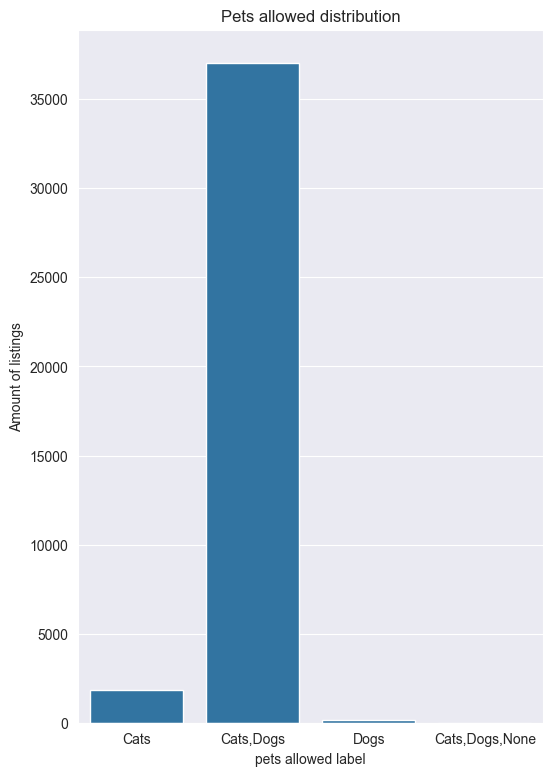

In [369]:
plt.figure(figsize=(6,9))
sns.countplot(data, x='pets_allowed')
plt.xlabel("pets allowed label")
plt.ylabel("Amount of listings")
plt.title("Pets allowed distribution")
plt.show()

In [370]:
print(f"procentage of pets not allowed {len(data.loc[data['pets_allowed'].isnull()])/(len(data))*100}")
print(f"procentage of Cats, Dogs {len(data.loc[data['pets_allowed']=='Cats,Dogs'])/(len(data))*100}")
print(f"procentage of Cats {len(data.loc[data['pets_allowed']=='Cats'])/(len(data))*100}")
print(f"procentage of Dogs {len(data.loc[data['pets_allowed']=='Dogs'])/(len(data))*100}")

procentage of pets not allowed 60.685999879083454
procentage of Cats, Dogs 37.33197638096774
procentage of Cats 1.8530460893573286
procentage of Dogs 0.12797001269623748


Baseret på overstående nøjes med at skelne mellem om husdyr er tilladt eller ej. For at gøre det lettere at arbejde med laver jeg værdierne om til 1 hvis værdien er enten 'Cats,Dogs', 'Cats' eller 'Dogs', og 0 hvis værdien er None eller null.

In [371]:
data.loc[data['pets_allowed'].isnull(), 'pets_allowed'] = 0
data.loc[data['pets_allowed'] != 0, 'pets_allowed'] = 1
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99242 entries, 0 to 99491
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bathrooms           99242 non-null  float64
 1   Cable or Satellite  99242 non-null  int64  
 2   Doorman             99242 non-null  int64  
 3   Storage             99242 non-null  int64  
 4   Golf                99242 non-null  int64  
 5   Playground          99242 non-null  int64  
 6   Clubhouse           99242 non-null  int64  
 7   Basketball          99242 non-null  int64  
 8   Gym                 99242 non-null  int64  
 9   Pool                99242 non-null  int64  
 10  Elevator            99242 non-null  int64  
 11  Luxury              99242 non-null  int64  
 12  Garbage Disposal    99242 non-null  int64  
 13  AC                  99242 non-null  int64  
 14  View                99242 non-null  int64  
 15  Washer Dryer        99242 non-null  int64  
 16  Fireplace

In [372]:
data['pets_allowed'] = data['pets_allowed'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99242 entries, 0 to 99491
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bathrooms           99242 non-null  float64
 1   Cable or Satellite  99242 non-null  int64  
 2   Doorman             99242 non-null  int64  
 3   Storage             99242 non-null  int64  
 4   Golf                99242 non-null  int64  
 5   Playground          99242 non-null  int64  
 6   Clubhouse           99242 non-null  int64  
 7   Basketball          99242 non-null  int64  
 8   Gym                 99242 non-null  int64  
 9   Pool                99242 non-null  int64  
 10  Elevator            99242 non-null  int64  
 11  Luxury              99242 non-null  int64  
 12  Garbage Disposal    99242 non-null  int64  
 13  AC                  99242 non-null  int64  
 14  View                99242 non-null  int64  
 15  Washer Dryer        99242 non-null  int64  
 16  Fireplace

### 'fee' value

In [373]:
data['fee'].unique()

array(['No', 'Yes'], dtype=object)

kolonnen 'fee' har kun to mulige varibler, 'Yes' og 'No', disse ændre til henholdsvis 1 og 0.

In [374]:
data['fee'] = data['fee'].apply(lambda x: 1 if x == 'Yes' else 0)
data

,bathrooms,Cable or Satellite,Doorman,Storage,Golf,Playground,Clubhouse,Basketball,Gym,Pool,...,bedrooms,fee,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude
0,1.0,0,0,0,0,0,0,0,0,0,...,1.0,0,Thumbnail,1,2195.0,542,Redondo Beach,CA,33.8520,-118.3759
1,1.5,0,0,0,0,0,0,0,0,0,...,3.0,0,Thumbnail,1,1250.0,1500,Newport News,VA,37.0867,-76.4941
2,2.0,0,0,0,0,0,0,0,0,0,...,3.0,0,Thumbnail,0,1395.0,1650,Raleigh,NC,35.8230,-78.6438
3,1.0,0,0,0,0,0,0,0,0,0,...,2.0,0,Thumbnail,1,1600.0,820,Vacaville,CA,38.3622,-121.9712
4,1.0,0,0,0,0,0,0,0,0,0,...,1.0,0,Thumbnail,1,975.0,624,Albuquerque,NM,35.1038,-106.6110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,1.0,0,0,1,0,1,0,0,1,0,...,1.0,0,Yes,0,780.0,605,Houston,TX,29.6151,-95.1998
99488,2.0,1,0,1,0,1,1,0,1,1,...,2.0,0,Yes,1,813.0,921,Jacksonville,FL,30.2254,-81.7579
99489,1.0,0,0,0,0,0,0,0,0,0,...,1.0,0,Yes,1,1325.0,650,San Diego,CA,32.7379,-117.0914
99490,1.0,0,0,0,0,0,0,0,1,1,...,1.0,0,Yes,1,931.0,701,Huntersville,NC,35.4158,-80.8451


### 'has_photo' value

In [375]:
data['has_photo'].unique()

array(['Thumbnail', 'No', 'Yes'], dtype=object)

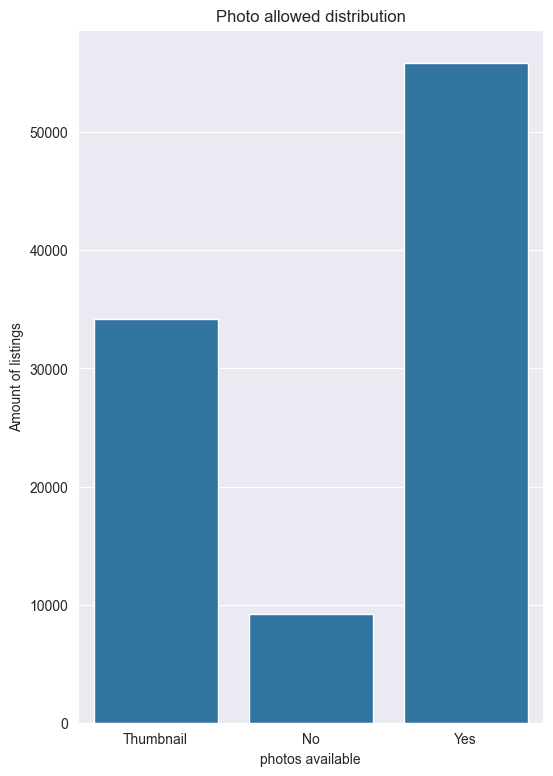

In [376]:
plt.figure(figsize=(6,9))
sns.countplot(data, x='has_photo')
plt.xlabel("photos available")
plt.ylabel("Amount of listings")
plt.title("Photo allowed distribution")
plt.show()

Disse værdier tildelse følgende værdier:
- 'No' = 0
- 'Thumbnail' = 1
- 'Yes' = 2

In [377]:
data['has_photo'] = data['has_photo'].apply(lambda x: 0 if x == 'No' else 1 if x == 'Thumbnail' else 2)
data

,bathrooms,Cable or Satellite,Doorman,Storage,Golf,Playground,Clubhouse,Basketball,Gym,Pool,...,bedrooms,fee,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude
0,1.0,0,0,0,0,0,0,0,0,0,...,1.0,0,1,1,2195.0,542,Redondo Beach,CA,33.8520,-118.3759
1,1.5,0,0,0,0,0,0,0,0,0,...,3.0,0,1,1,1250.0,1500,Newport News,VA,37.0867,-76.4941
2,2.0,0,0,0,0,0,0,0,0,0,...,3.0,0,1,0,1395.0,1650,Raleigh,NC,35.8230,-78.6438
3,1.0,0,0,0,0,0,0,0,0,0,...,2.0,0,1,1,1600.0,820,Vacaville,CA,38.3622,-121.9712
4,1.0,0,0,0,0,0,0,0,0,0,...,1.0,0,1,1,975.0,624,Albuquerque,NM,35.1038,-106.6110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,1.0,0,0,1,0,1,0,0,1,0,...,1.0,0,2,0,780.0,605,Houston,TX,29.6151,-95.1998
99488,2.0,1,0,1,0,1,1,0,1,1,...,2.0,0,2,1,813.0,921,Jacksonville,FL,30.2254,-81.7579
99489,1.0,0,0,0,0,0,0,0,0,0,...,1.0,0,2,1,1325.0,650,San Diego,CA,32.7379,-117.0914
99490,1.0,0,0,0,0,0,0,0,1,1,...,1.0,0,2,1,931.0,701,Huntersville,NC,35.4158,-80.8451


In [378]:
data['has_photo'].unique()

array([1, 0, 2])

### "cityname" value 

In [379]:
len(data['cityname'].unique())

2976

In [380]:
len(data.loc[data['cityname'].isnull()])

298

først vil jeg fjerne alle rækker, som ikke har et bynavn

In [381]:
data.loc[data['cityname'].isnull(), 'cityname'] = "No cityname"
data.drop(data[data['cityname'] == 'No cityname'].index, inplace=True)

Jeg vil erstatte alle byer der opstår 10 gange eller færre med other

In [382]:
cities_few_instances = data.groupby('cityname')['cityname'].agg('count').sort_values(ascending=False)
len(cities_few_instances[cities_few_instances<=10])

1975

In [383]:
cities_few_instances=cities_few_instances[cities_few_instances<=10]
data.cityname = data.cityname.apply(lambda x: 'Other' if x in cities_few_instances else x)

In [384]:
data.groupby('cityname')['cityname'].agg('count').sort_values(ascending=False)

cityname
Other          5984
Dallas         2854
Denver         2750
Los Angeles    2401
Las Vegas      1846
               ... 
Denton           11
Meridian         11
Clemmons         11
Maryville        11
Highland         11
Name: cityname, Length: 1001, dtype: int64

Jeg vil oprette et dictionary, med bynavne for at erstatte disse med et int

In [385]:
citydict = {}
y = 0
for i in data['cityname'].unique():
    citydict.update({i : y})
    y = y + 1

In [386]:
citydict

{'Redondo Beach': 0,
 'Newport News': 1,
 'Raleigh': 2,
 'Vacaville': 3,
 'Albuquerque': 4,
 'Hampton': 5,
 'Lakewood': 6,
 'Charleston': 7,
 'Other': 8,
 'Alpharetta': 9,
 'Washington': 10,
 'Scottsdale': 11,
 'Ames': 12,
 'Kirkland': 13,
 'San Antonio': 14,
 'Oxford': 15,
 'Portland': 16,
 'Austin': 17,
 'Round Rock': 18,
 'Georgetown': 19,
 'West Palm Beach': 20,
 'Kansas City': 21,
 'Pittsburgh': 22,
 'Urbandale': 23,
 'Allston': 24,
 'San Jose': 25,
 'Oakland': 26,
 'Berkeley': 27,
 'Madison': 28,
 'Sherman Oaks': 29,
 'Concord': 30,
 'Arlington': 31,
 'Alexandria': 32,
 'Dallas': 33,
 'Chicago': 34,
 'Tulsa': 35,
 'Ogden': 36,
 'Orlando': 37,
 'Providence': 38,
 'Urbana': 39,
 'Lafayette': 40,
 'Champaign': 41,
 'Sacramento': 42,
 'Lees Summit': 43,
 'Jacksonville': 44,
 'Orange': 45,
 'Boulder': 46,
 'Owings Mills': 47,
 'Saint Petersburg': 48,
 'Houston': 49,
 'Saint Louis': 50,
 'Kent': 51,
 'Oklahoma City': 52,
 'Bowling Green': 53,
 'Nashville': 54,
 'Dickinson': 55,
 'Omaha

In [387]:
data['cityname'] = data['cityname'].replace(citydict)

C:\Users\mmsor\AppData\Local\Temp\ipykernel_17580\8629544.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['cityname'] = data['cityname'].replace(citydict)


In [388]:
data

,bathrooms,Cable or Satellite,Doorman,Storage,Golf,Playground,Clubhouse,Basketball,Gym,Pool,...,bedrooms,fee,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude
0,1.0,0,0,0,0,0,0,0,0,0,...,1.0,0,1,1,2195.0,542,0,CA,33.8520,-118.3759
1,1.5,0,0,0,0,0,0,0,0,0,...,3.0,0,1,1,1250.0,1500,1,VA,37.0867,-76.4941
2,2.0,0,0,0,0,0,0,0,0,0,...,3.0,0,1,0,1395.0,1650,2,NC,35.8230,-78.6438
3,1.0,0,0,0,0,0,0,0,0,0,...,2.0,0,1,1,1600.0,820,3,CA,38.3622,-121.9712
4,1.0,0,0,0,0,0,0,0,0,0,...,1.0,0,1,1,975.0,624,4,NM,35.1038,-106.6110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,1.0,0,0,1,0,1,0,0,1,0,...,1.0,0,2,0,780.0,605,49,TX,29.6151,-95.1998
99488,2.0,1,0,1,0,1,1,0,1,1,...,2.0,0,2,1,813.0,921,44,FL,30.2254,-81.7579
99489,1.0,0,0,0,0,0,0,0,0,0,...,1.0,0,2,1,1325.0,650,237,CA,32.7379,-117.0914
99490,1.0,0,0,0,0,0,0,0,1,1,...,1.0,0,2,1,931.0,701,337,NC,35.4158,-80.8451


### "state" value

In [389]:
len(data['state'].unique())

51

In [390]:
len(data.loc[data['state'].isnull()])

0

Til kolonnen 'state' bruger jeg samme metode som til cityname. jeg starter med at fjerne alle rækker der ikke har en værdi i kolonnen.

In [391]:
data.loc[data['state'].isnull(), 'state'] = "No state"
data.drop(data[data['state'] == 'No state'].index, inplace=True)

Derefter opretter jeg et dictionary, og erstatter værdierne.

In [392]:
data['state'].unique()

array(['CA', 'VA', 'NC', 'NM', 'CO', 'WV', 'GA', 'MA', 'DC', 'AZ', 'IA',
       'WA', 'TX', 'IL', 'MS', 'OR', 'FL', 'MO', 'PA', 'WI', 'OK', 'UT',
       'RI', 'NJ', 'IN', 'MD', 'OH', 'TN', 'ND', 'NE', 'AR', 'MI', 'MN',
       'HI', 'ID', 'SC', 'KS', 'AL', 'SD', 'NY', 'KY', 'LA', 'AK', 'CT',
       'NV', 'WY', 'VT', 'NH', 'MT', 'DE', 'ME'], dtype=object)

In [393]:
statedict = {}
y = 0
for i in data['state'].unique():
    statedict.update({i : y})
    y = y + 1

In [394]:
statedict

{'CA': 0,
 'VA': 1,
 'NC': 2,
 'NM': 3,
 'CO': 4,
 'WV': 5,
 'GA': 6,
 'MA': 7,
 'DC': 8,
 'AZ': 9,
 'IA': 10,
 'WA': 11,
 'TX': 12,
 'IL': 13,
 'MS': 14,
 'OR': 15,
 'FL': 16,
 'MO': 17,
 'PA': 18,
 'WI': 19,
 'OK': 20,
 'UT': 21,
 'RI': 22,
 'NJ': 23,
 'IN': 24,
 'MD': 25,
 'OH': 26,
 'TN': 27,
 'ND': 28,
 'NE': 29,
 'AR': 30,
 'MI': 31,
 'MN': 32,
 'HI': 33,
 'ID': 34,
 'SC': 35,
 'KS': 36,
 'AL': 37,
 'SD': 38,
 'NY': 39,
 'KY': 40,
 'LA': 41,
 'AK': 42,
 'CT': 43,
 'NV': 44,
 'WY': 45,
 'VT': 46,
 'NH': 47,
 'MT': 48,
 'DE': 49,
 'ME': 50}

In [395]:
data['state'] = data['state'].replace(statedict)
data

C:\Users\mmsor\AppData\Local\Temp\ipykernel_17580\1123041600.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['state'] = data['state'].replace(statedict)


,bathrooms,Cable or Satellite,Doorman,Storage,Golf,Playground,Clubhouse,Basketball,Gym,Pool,...,bedrooms,fee,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude
0,1.0,0,0,0,0,0,0,0,0,0,...,1.0,0,1,1,2195.0,542,0,0,33.8520,-118.3759
1,1.5,0,0,0,0,0,0,0,0,0,...,3.0,0,1,1,1250.0,1500,1,1,37.0867,-76.4941
2,2.0,0,0,0,0,0,0,0,0,0,...,3.0,0,1,0,1395.0,1650,2,2,35.8230,-78.6438
3,1.0,0,0,0,0,0,0,0,0,0,...,2.0,0,1,1,1600.0,820,3,0,38.3622,-121.9712
4,1.0,0,0,0,0,0,0,0,0,0,...,1.0,0,1,1,975.0,624,4,3,35.1038,-106.6110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,1.0,0,0,1,0,1,0,0,1,0,...,1.0,0,2,0,780.0,605,49,12,29.6151,-95.1998
99488,2.0,1,0,1,0,1,1,0,1,1,...,2.0,0,2,1,813.0,921,44,16,30.2254,-81.7579
99489,1.0,0,0,0,0,0,0,0,0,0,...,1.0,0,2,1,1325.0,650,237,0,32.7379,-117.0914
99490,1.0,0,0,0,0,0,0,0,1,1,...,1.0,0,2,1,931.0,701,337,2,35.4158,-80.8451


# Outlier Detection

## Outlier detection med box plot

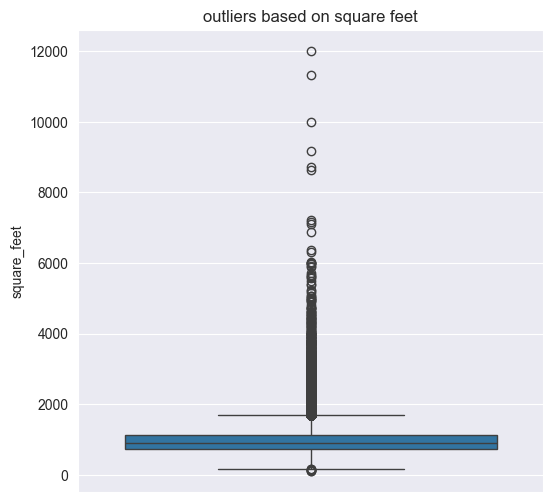

In [396]:
plt.figure(figsize=(6,6 ))
sns.boxplot(data['square_feet'])
plt.title("outliers based on square feet")
plt.show()

Outlier med IQR

In [397]:
Q1 = data['square_feet'].quantile(0.25)
Q3 = data['square_feet'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Number of outliers:
outliers = data[(data['square_feet'] < lower_bound) | (data['square_feet'] > upper_bound)]
print(f"Amount of outliers {outliers.shape[0]}")
print(f"Out of {data.shape[0]} datapoints")

data_no_outliers = data[(data['square_feet'] >= lower_bound) & (data['square_feet'] <= upper_bound)]

Amount of outliers 2827
Out of 98944 datapoints


# EDA
EDA Goals:
- Understand Price Distribution:
	- Analyze rental prices to see the typical range and identify high-end vs. affordable listings.
- Explore Size and Price Relationship:
	- Examine how square footage relates to price, which helps understand price per square foot.
- Location Analysis:
	- Check price trends by location or city to identify areas with higher rental costs.
- Amenity Impact:
	- Look at how features like balcony, parking, or pet-friendly affect rental prices.

In [398]:
# Spørg Naddem om:
#- Analyze rental prices to see the typical range and identify high-end vs. affordable listings.

# Explore Size and Price Relationship
Som man kan se på Heatmap er *square_feet* det felt med størst indflydelse på prisen, med en positiv korrelation på 0.4

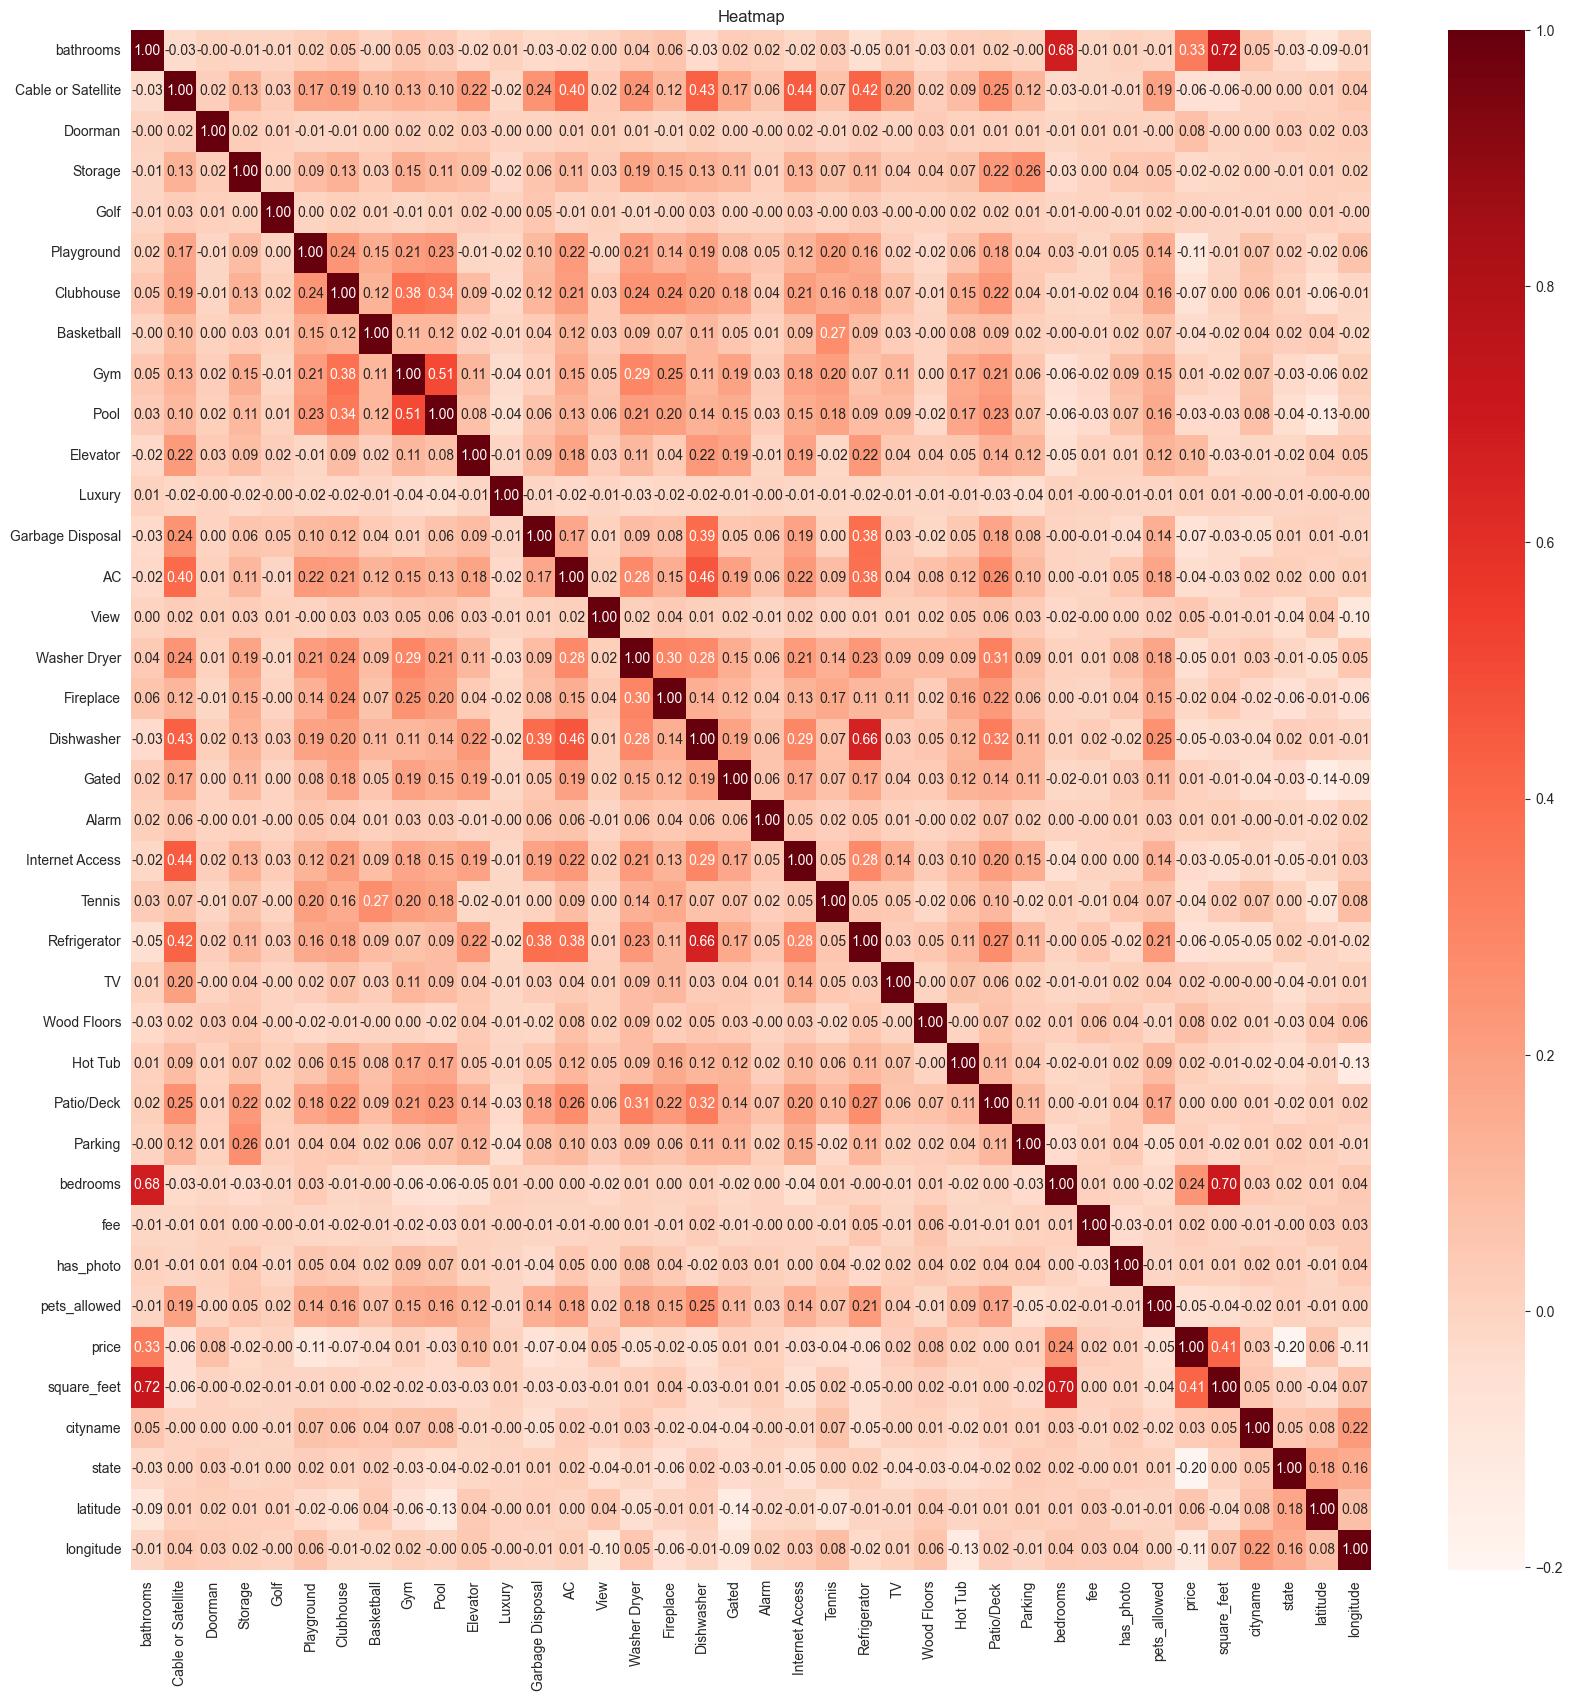

In [399]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True, cmap='Reds', fmt='.2f')
plt.title("Heatmap")
plt.show()

Text(0.5, 1.0, 'Square Feet to Price Ratio before outlier removal')

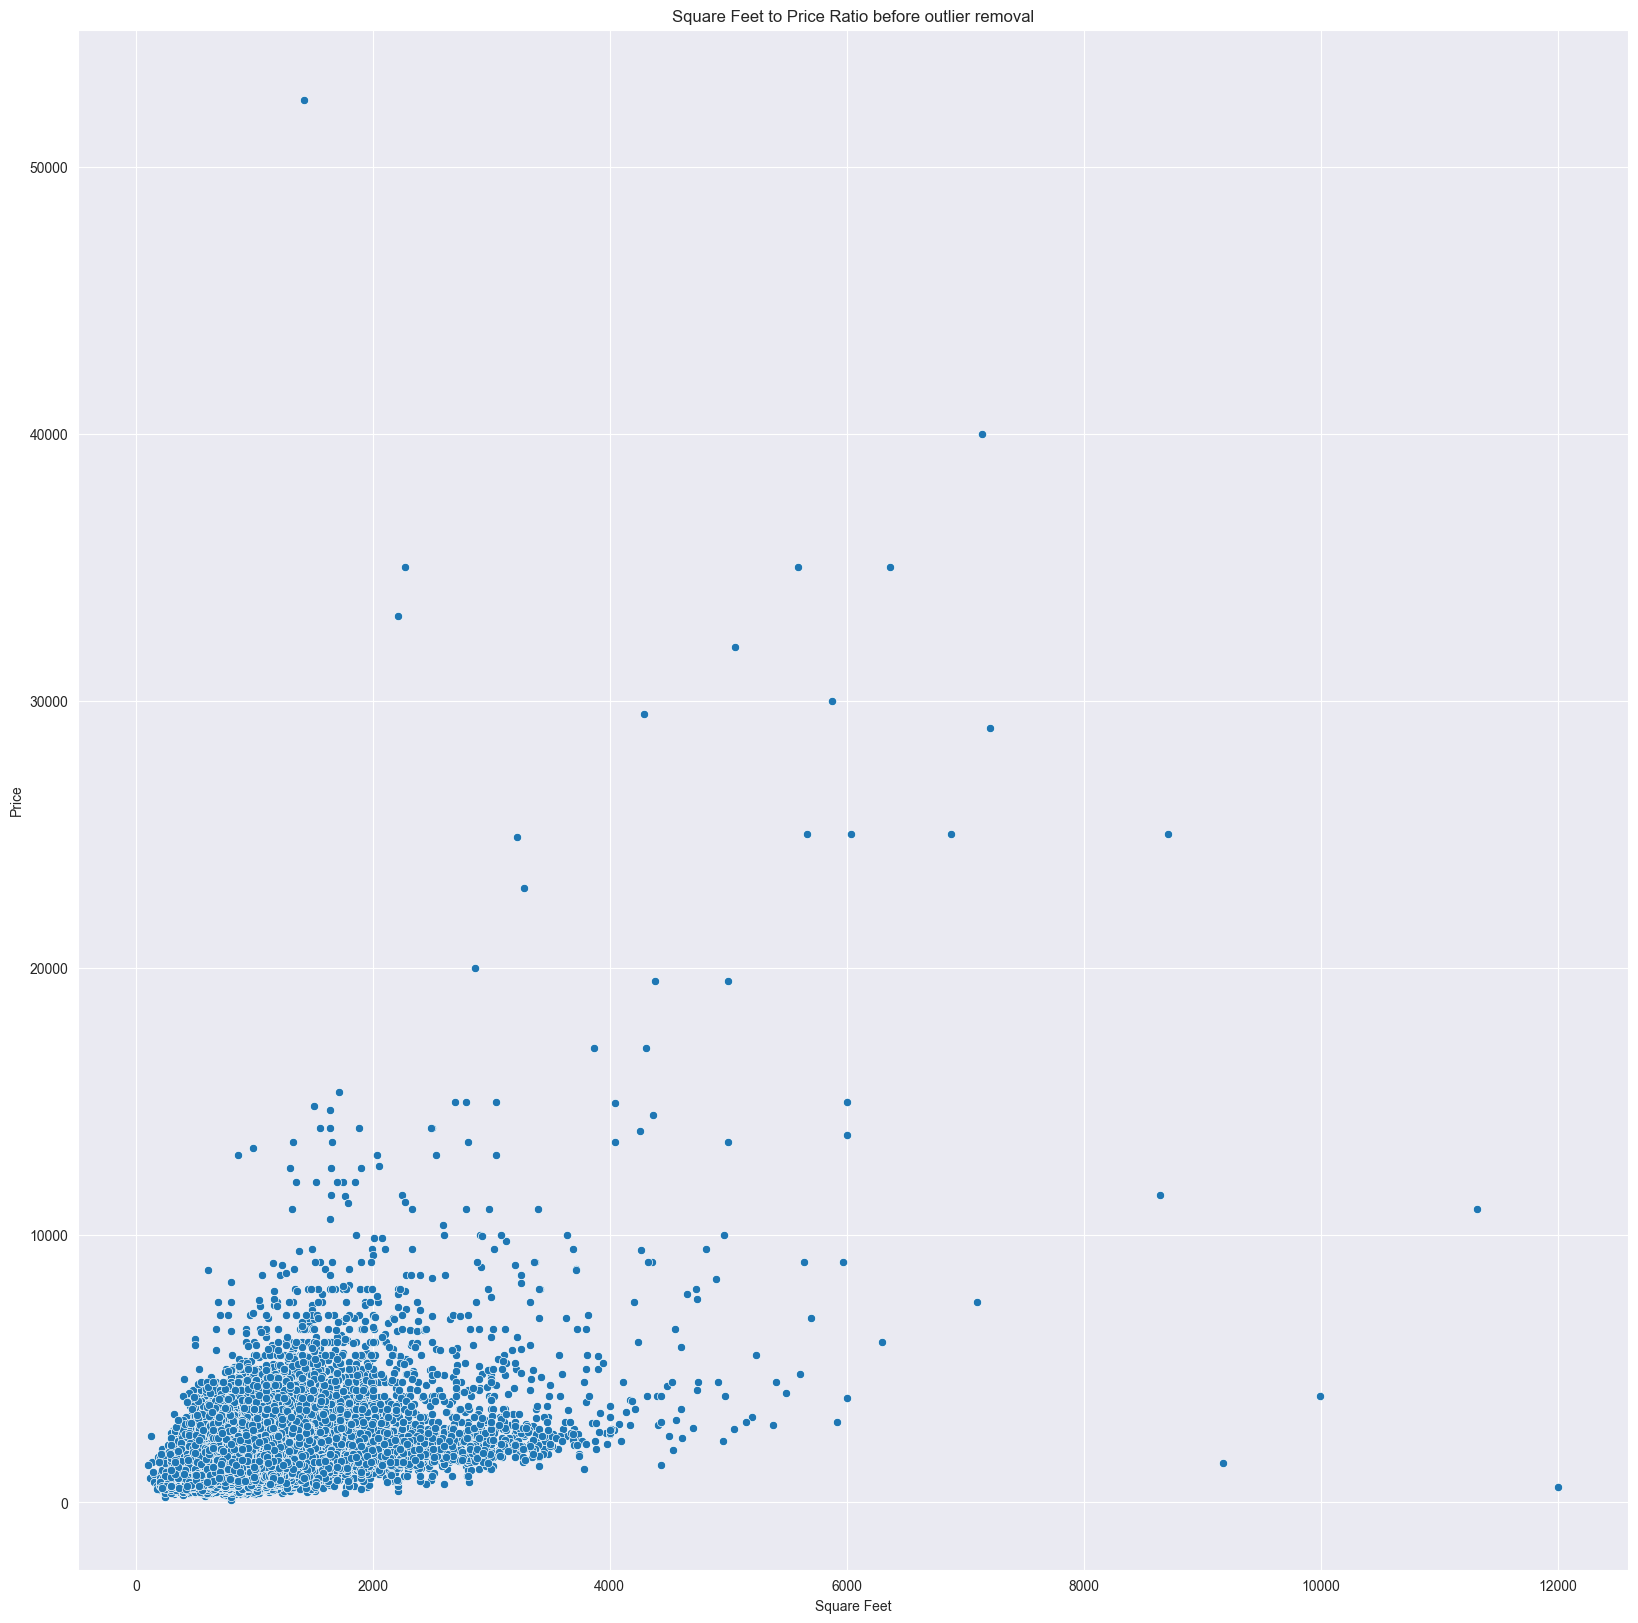

In [400]:
plt.figure(figsize=(20,20))
sns.scatterplot(data=data, x="square_feet", y="price")
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("Square Feet to Price Ratio before outlier removal")

Text(0.5, 1.0, 'Square Feet to Price Ratio after outlier removal')

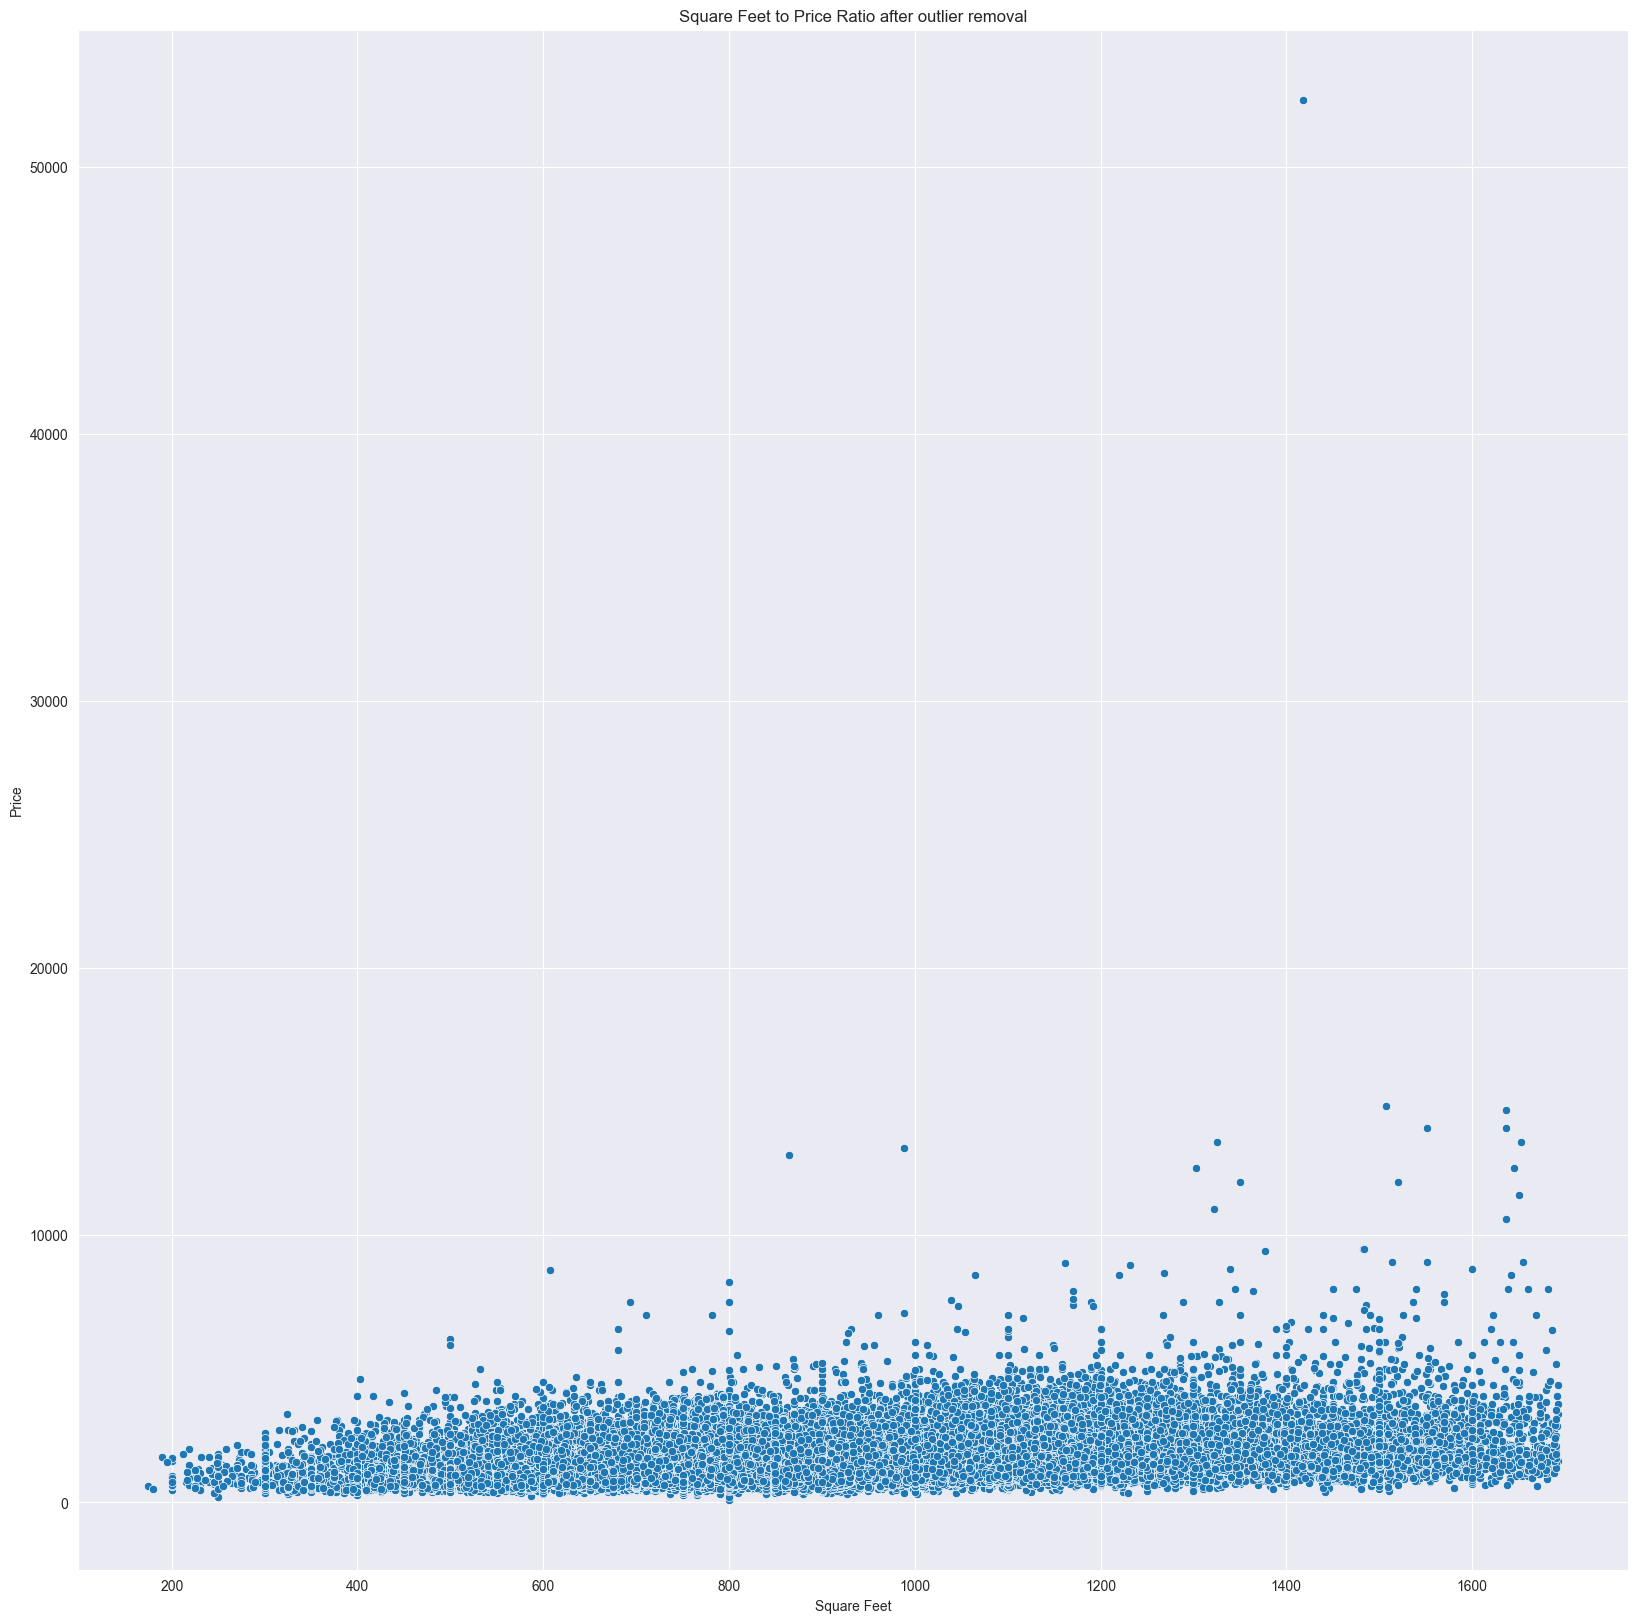

In [401]:
plt.figure(figsize=(20,20))
sns.scatterplot(data=data_no_outliers, x="square_feet", y="price")
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("Square Feet to Price Ratio after outlier removal")

### Removing the outliers

In [402]:
data = data_no_outliers

- Amenity Impact:
	- Look at how features like balcony, parking, or pet-friendly affect rental prices.

Som man kan se på Heatmap er der så godt som ingen sammenhæng mellem de forskellige amenities og prisen, dem der er tættest på er Elevator om en positiv korrelation på 0.1 og Doorman og Wood Floors med en positiv korrelation på 0.08

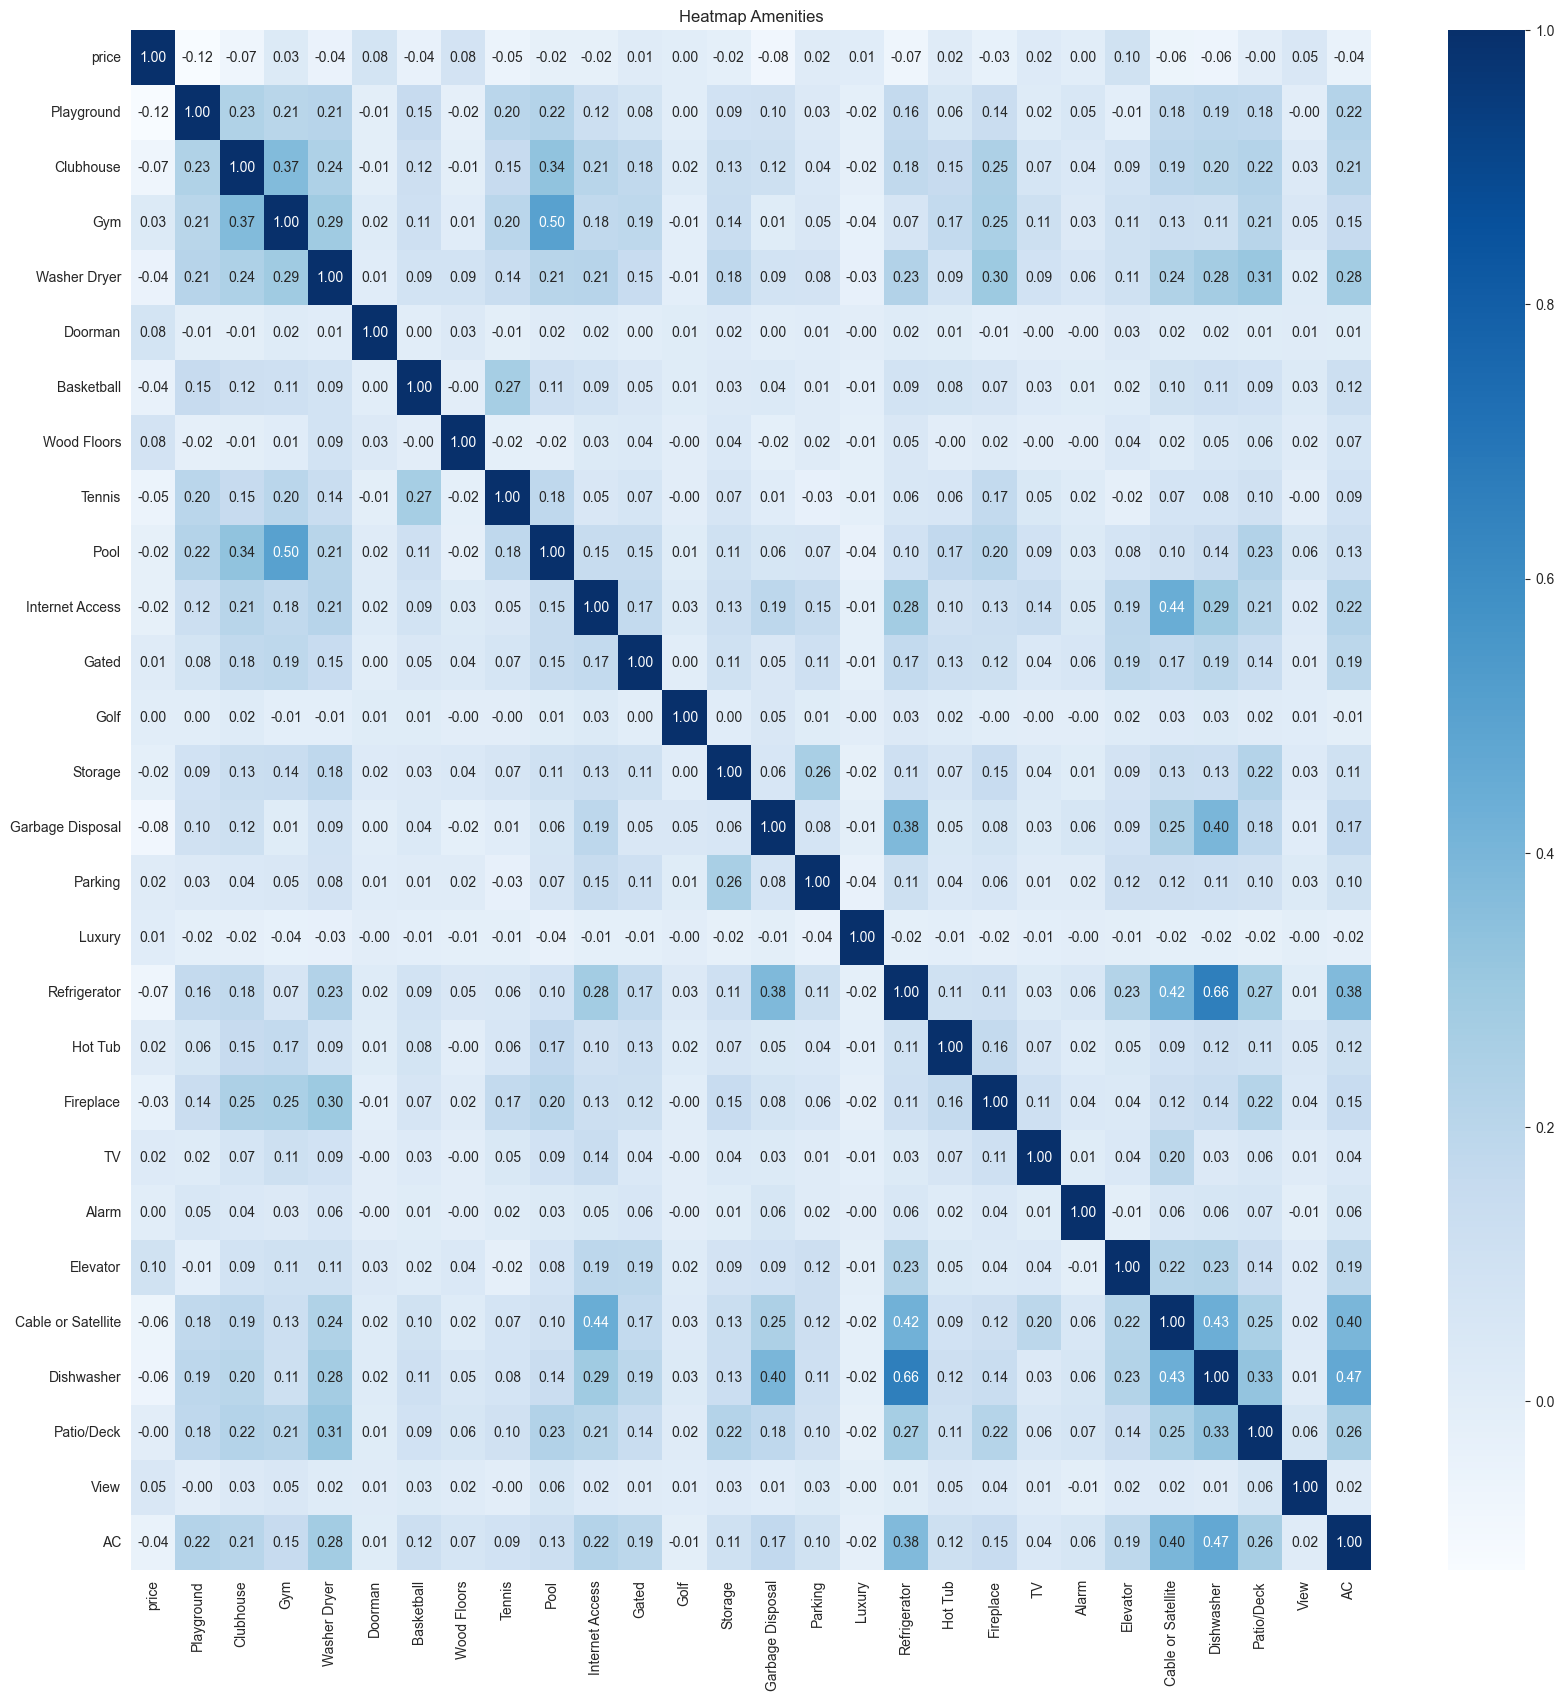

In [403]:
Amenities_Price_corr = data[['price','Playground', 'Clubhouse', 'Gym', 'Washer Dryer', 'Doorman',
       'Basketball', 'Wood Floors', 'Tennis', 'Pool', 'Internet Access',
       'Gated', 'Golf', 'Storage', 'Garbage Disposal', 'Parking', 'Luxury',
       'Refrigerator', 'Hot Tub', 'Fireplace', 'TV', 'Alarm', 'Elevator',
       'Cable or Satellite', 'Dishwasher', 'Patio/Deck', 'View', 'AC']].corr()
plt.figure(figsize=(20,20))
sns.heatmap(Amenities_Price_corr,annot=True, cmap='Blues', fmt='.2f')
plt.title("Heatmap Amenities")
plt.show()

# ML Goals
- Predict Rental Price:
	- Build a regression model to predict price based on features like location, size, and amenities.
- Classify Apartments by Price Range:
	- Use classification to group apartments into price tiers (e.g., budget, mid-range, luxury).
- Identify Key Price Drivers:
	- Use feature importance to find the most influential factors affecting rental prices.



 # Predict Rental Price:
	- Build a regression model to predict price based on features like location, size, and amenities.

In [404]:
X = data.drop(columns=['price'])
y = data['price']

In [405]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96117 entries, 0 to 99491
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bathrooms           96117 non-null  float64
 1   Cable or Satellite  96117 non-null  int64  
 2   Doorman             96117 non-null  int64  
 3   Storage             96117 non-null  int64  
 4   Golf                96117 non-null  int64  
 5   Playground          96117 non-null  int64  
 6   Clubhouse           96117 non-null  int64  
 7   Basketball          96117 non-null  int64  
 8   Gym                 96117 non-null  int64  
 9   Pool                96117 non-null  int64  
 10  Elevator            96117 non-null  int64  
 11  Luxury              96117 non-null  int64  
 12  Garbage Disposal    96117 non-null  int64  
 13  AC                  96117 non-null  int64  
 14  View                96117 non-null  int64  
 15  Washer Dryer        96117 non-null  int64  
 16  Fireplace

### Linear Regression

In [406]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=12, test_size=0.2)

In [407]:
X_train

,bathrooms,Cable or Satellite,Doorman,Storage,Golf,Playground,Clubhouse,Basketball,Gym,Pool,...,Parking,bedrooms,fee,has_photo,pets_allowed,square_feet,cityname,state,latitude,longitude
49291,1.0,0,0,1,0,0,0,0,0,0,...,1,1.0,0,2,0,1138,214,44,36.1698,-115.2788
10290,1.0,0,0,0,0,0,0,0,0,1,...,1,1.0,0,2,0,726,242,4,40.5853,-105.0839
67707,2.0,0,0,0,0,0,1,0,0,1,...,0,2.0,0,2,1,1125,932,12,33.1139,-96.6958
22970,2.0,0,0,1,0,0,0,0,1,1,...,1,3.0,0,1,0,1250,214,44,36.1198,-115.0497
85117,2.0,0,0,0,0,0,0,0,0,1,...,1,2.0,0,2,0,863,49,12,29.9291,-95.3961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77699,1.0,0,0,0,0,0,0,0,0,0,...,1,2.0,0,1,0,772,44,2,34.7662,-77.4335
37911,1.0,0,0,0,0,0,0,0,1,0,...,0,2.0,0,2,1,882,33,12,33.0023,-96.8406
41724,2.0,1,0,1,0,1,1,0,1,1,...,1,4.0,0,0,0,1238,8,44,39.5927,-119.7771
20757,1.0,1,0,0,0,0,1,1,1,1,...,1,1.0,0,1,1,672,31,12,32.7767,-97.0816


In [408]:
X_test

,bathrooms,Cable or Satellite,Doorman,Storage,Golf,Playground,Clubhouse,Basketball,Gym,Pool,...,Parking,bedrooms,fee,has_photo,pets_allowed,square_feet,cityname,state,latitude,longitude
28502,1.0,1,0,1,0,0,0,0,1,1,...,0,1.0,0,1,1,676,122,4,39.9041,-105.0070
54938,2.0,0,0,1,0,1,0,0,1,1,...,1,2.0,0,1,0,974,187,40,37.9995,-84.5308
4620,1.0,1,0,0,0,0,0,0,0,1,...,1,1.0,0,1,0,470,76,24,40.4969,-86.9659
52178,1.0,0,0,0,0,0,0,0,1,1,...,0,1.0,0,1,1,713,863,41,29.9998,-91.8178
90985,2.0,0,0,0,0,0,0,0,0,0,...,0,3.0,0,2,0,1523,466,6,33.7848,-84.3922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86620,1.0,1,0,1,0,1,1,0,1,1,...,1,1.0,0,2,1,519,277,6,33.8614,-84.5382
206,1.0,1,0,0,0,0,0,0,0,1,...,0,1.0,0,1,1,664,8,24,41.6650,-86.1592
24533,1.0,0,0,0,0,0,1,0,1,1,...,0,1.0,0,2,1,783,47,25,39.4276,-76.7727
99226,1.0,0,0,0,0,0,0,0,0,0,...,1,2.0,0,2,0,678,114,24,39.8332,-85.9784


In [409]:
# Train Linear Regression 
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

# Evaluate linear Regression
print('R2 Score')
print(r2_score(y_test,y_pred))

R2 Score
0.24865520703067567


In [410]:
results_df = pd.DataFrame({
    'Actual Value':y_test,
    'Predicted Value': y_pred
})
print(results_df)

       Actual Value  Predicted Value
28502        1340.0      1275.503411
54938         923.0      1106.970089
4620          999.0       746.876574
52178         601.0       725.323539
90985        1675.0      2058.947053
...             ...              ...
86620         938.0       698.660180
206          1180.0       984.384424
24533        1281.0       958.725578
99226         669.0      1094.492707
15029        1455.0      1578.012172

[19224 rows x 2 columns]


In [411]:
# Calculate MAE, MSE, RMSE, and R²
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2 * 100:.2f}%")

Mean Absolute Error: 434.92063217871254
Mean Squared Error: 393067.61941663246
Root Mean Squared Error: 626.951050255626
R² Score: 24.87%


Jeg vil forsøge at begrænse dimensionalitet af dataen, ved kun at fokuserer på de 10 vigtigste features.
Da jeg forsøger med LinearRegression modellen kan jeg ikke her benytte feature_importances_, istedet kan jeg benytte coef_ for at bestemme attributternes vigtighed, for at gøre dette skal jeg bruge Standardization

In [412]:
scaler = StandardScaler()
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=12, test_size=0.2)
X = data.drop(columns=['price'])
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=12, test_size=0.2)

# Scaling the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fitting the model and extractiong data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Identify top 10 features
coefficients = model.coef_
feature_names = X_train.columns

top_10_indices = np.argsort(np.abs(coefficients))[-10:][::-1]
top_10_features = feature_names[top_10_indices]

# Get top feastures from original data
X_train_top_10 = X_train_scaled[:, top_10_indices]
X_test_top_10 = X_test_scaled[:, top_10_indices]

# Train new model with only top 10 features 
model_top_10 = LinearRegression()
model_top_10.fit(X_train_top_10, y_train)

# Predictions made by new model
predictions_top_10 = model_top_10.predict(X_test_top_10)


In [413]:
# Calculate MAE, MSE, RMSE, and R²
mae = mean_absolute_error(y_test, predictions_top_10)
mse = mean_squared_error(y_test, predictions_top_10)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions_top_10)

# Print the results
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2 * 100:.2f}%")

Mean Absolute Error: 443.6297704866863
Mean Squared Error: 403425.1172783557
Root Mean Squared Error: 635.157553114466
R² Score: 22.89%


In [414]:
# Evaluate R² on the training set
r2_train = model_top_10.score(X_train_top_10, y_train)
print("R² on training set:", r2_train)

# Evaluate R² on the test set
r2_test = model_top_10.score(X_test_top_10, y_test)
print("R² on test set:", r2_test)

R² on training set: 0.22977852086039174
R² on test set: 0.2288569542563914


In [415]:
data_comparison = {'Actual values': y_test,
                   'predictions': predictions_top_10}
compare_df = pd.DataFrame(data_comparison)
compare_df

,Actual values,predictions
28502,1340.0,1549.197986
54938,923.0,952.876946
4620,999.0,988.507320
52178,601.0,768.643262
90985,1675.0,1999.620704
...,...,...
86620,938.0,853.529028
206,1180.0,1203.835650
24533,1281.0,1202.601987
99226,669.0,1058.356542


### RandomForestRegressor

In [416]:
X = data.drop(columns=['price'])
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [417]:
model = RandomForestRegressor(n_estimators=500)

model.fit(X_train, y_train)

rf_pred = model.predict(X_test)

In [418]:
# Calculate MAE, MSE, RMSE, and R²
mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rf_pred)

# Print the results
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2 * 100:.2f}%")

Mean Absolute Error: 146.48829990239796
Mean Squared Error: 74408.7174728963
Root Mean Squared Error: 272.77961337478337
R² Score: 85.30%


#### RandomForrestRegressor Big 

In [419]:
X = data.drop(columns=['price'])
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [420]:
model = RandomForestRegressor(n_estimators=2000)

model.fit(X_train, y_train)

rf_pred = model.predict(X_test)

In [421]:
# Calculate MAE, MSE, RMSE, and R²
mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rf_pred)

# Print the results
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2 * 100:.2f}%")

Mean Absolute Error: 147.26070390653962
Mean Squared Error: 210997.97665093307
Root Mean Squared Error: 459.34516069175373
R² Score: 68.10%


#### RandomForrestRegressor top top 10

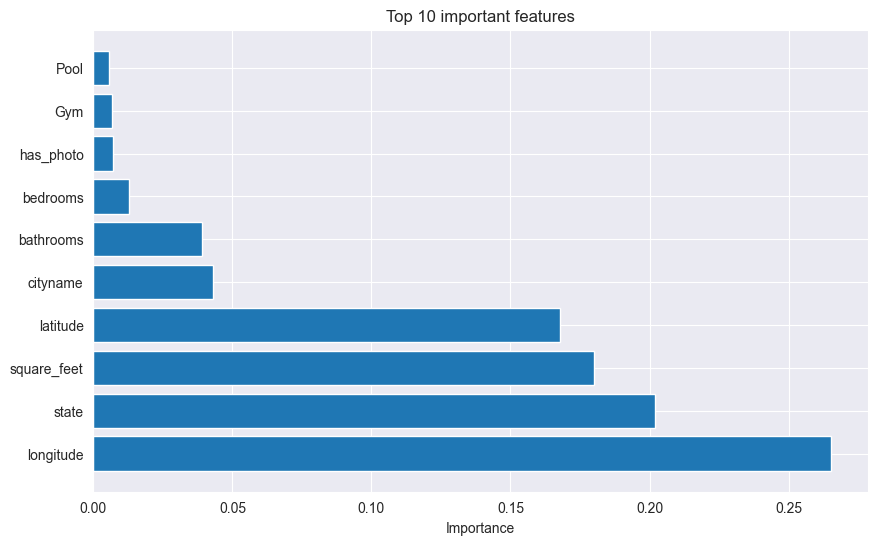

In [422]:
importances = model.feature_importances_
indices = np.argsort(importances)[-10:][::-1]

top_10_features = X_train.columns[indices]
top_importances = importances[indices]

plt.figure(figsize=(10,6))
plt.barh(top_10_features, top_importances)
plt.xlabel("Importance")
plt.title("Top 10 important features")
plt.show()


In [423]:
X_train_top_10 = X_train[top_10_features]
X_test_top_10 = X_test[top_10_features]

X_test_top_10

,longitude,state,square_feet,latitude,cityname,bathrooms,bedrooms,has_photo,Gym,Pool
63112,-121.2391,0,900,38.7917,956,1.0,2.0,1,1,0
44277,-76.2530,1,800,36.9427,409,1.0,2.0,2,0,0
33723,-80.2159,2,610,36.1036,610,1.0,1.0,1,1,1
70863,-111.6341,9,1600,35.1400,247,2.5,3.0,2,0,0
66818,-115.0758,44,1208,36.0397,325,2.0,2.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
48181,-84.5022,26,1063,39.1054,66,2.0,2.0,2,0,0
37063,-119.7383,44,825,39.5416,602,1.0,2.0,2,0,0
61384,-110.9861,9,1150,32.3282,78,2.0,2.0,1,0,0
10950,-84.2039,6,1186,34.0791,9,2.0,2.0,2,1,1


In [424]:
model.fit(X_train_top_10, y_train)

predictions_top_10 = model.predict(X_test_top_10)

In [425]:
# Calculate MAE, MSE, RMSE, and R²
mae = mean_absolute_error(y_test, predictions_top_10)
mse = mean_squared_error(y_test, predictions_top_10)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions_top_10)

# Print the results
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2 * 100:.2f}%")

Mean Absolute Error: 152.58145341260268
Mean Squared Error: 216802.62003167067
Root Mean Squared Error: 465.620682564328
R² Score: 67.22%
